In [558]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [560]:
df = pd.read_csv('Titanic_dataset.csv')  

In [562]:
print(df.head())

   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  2urvived  
0        0        0         0 

In [564]:
df = df.drop(columns=['zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 
                      'zero.5', 'zero.6', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11',
                          'zero.12', 'zero.13', 'zero.14', 'zero.15', 
                          'zero.16', 'zero.17', 'zero.18'])

In [566]:
X = df.drop(columns=['2urvived'])
y = df['2urvived']

In [568]:
X = X.fillna(X.mean())

In [570]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [572]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [574]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga']  
}

In [576]:
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='accuracy')

In [578]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best Accuracy: 0.8309409888357259


In [580]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [582]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[179  10]
 [ 29  44]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       189
           1       0.81      0.60      0.69        73

    accuracy                           0.85       262
   macro avg       0.84      0.77      0.80       262
weighted avg       0.85      0.85      0.84       262



In [584]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


In [586]:
cm = confusion_matrix(y_test, y_pred)

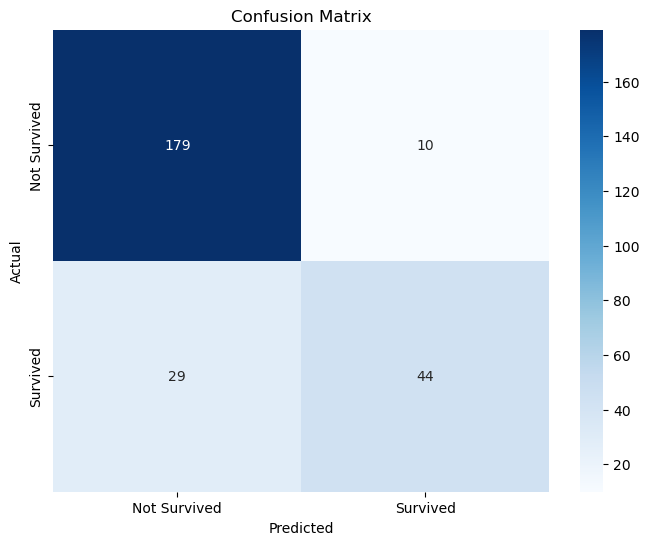

In [588]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()